# COVID XRAY Image Analysis

## First Explorative Data Analysis

### Importing `libraries`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cms
import seaborn as sns
import cv2
import os

### Importing `meta data`

In [2]:
covid_df = pd.read_excel('../../data/raw/COVID.metadata.xlsx')
covid_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [14]:
pd.DataFrame(covid_df.URL.value_counts())

,count
URL,
https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711,2474
https://github.com/armiro/COVID-CXNet,400
https://eurorad.org,258
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png,183
https://github.com/ieee8023/covid-chestxray-dataset,182
https://sirm.org/category/senza-categoria/covid-19/,119


In [7]:
normal_df = pd.read_excel('../../data/raw/Normal.metadata.xlsx')
normal_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [8]:
normal_df.URL.value_counts()

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    8851
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia       1341
Name: count, dtype: int64

In [10]:
lung_opacity_df = pd.read_excel('../../data/raw/Lung_Opacity.metadata.xlsx')
lung_opacity_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [11]:
lung_opacity_df.URL.value_counts()

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    6012
Name: count, dtype: int64

In [12]:
viral_pneumonia_df = pd.read_excel('../../data/raw/Viral Pneumonia.metadata.xlsx')
viral_pneumonia_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [13]:
viral_pneumonia_df.URL.value_counts()

URL
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia    1345
Name: count, dtype: int64

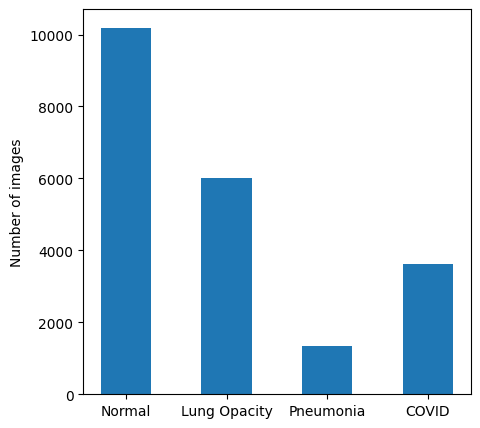

In [138]:
# count of images from meta data

count_of_images = [normal_df['FILE NAME'].count(), lung_opacity_df['FILE NAME'].count(), viral_pneumonia_df['FILE NAME'].count(), covid_df['FILE NAME'].count()]
plt.figure(figsize=(5, 5))
plt.bar(x = range(1,5), height = count_of_images, width = 0.5)
plt.ylabel('Number of images')
plt.xticks([1, 2, 3, 4], ['Normal', 'Lung Opacity', 'Pneumonia', 'COVID']);

In [139]:
# table with unique sizes

unique_sizes = pd.DataFrame(data = [normal_df['SIZE'].unique(), lung_opacity_df['SIZE'].unique(), viral_pneumonia_df['SIZE'].unique(), covid_df['SIZE'].unique()], 
                            index = ['Normal', 'Lung Opacity', 'Pneumonia', 'COVID'], columns = ['Unique sizes'])

unique_sizes

,Unique sizes
Normal,256*256
Lung Opacity,256*256
Pneumonia,256*256
COVID,256*256


### Importing `images` and `masks`

In [5]:
# images
img_covid_1 = cv2.imread('../data/COVID/images/COVID-1.png', cv2.IMREAD_COLOR)
img_normal_1 = cv2.imread('../data/Normal/images/Normal-1.png', cv2.IMREAD_COLOR)
img_lung_opacity_1 = cv2.imread('../data/Lung_Opacity/images/Lung_Opacity-1.png', cv2.IMREAD_COLOR)
img_viral_pneumonia_1 = cv2.imread('../data/Viral Pneumonia/images/Viral Pneumonia-1.png', cv2.IMREAD_COLOR)

# masks
mask_covid_1 = cv2.imread('../data/COVID/masks/COVID-1.png', cv2.IMREAD_COLOR)
mask_normal_1 = cv2.imread('../data/Normal/masks/Normal-1.png', cv2.IMREAD_COLOR)
mask_lung_opacity_1 = cv2.imread('../data/Lung_Opacity/masks/Lung_Opacity-1.png', cv2.IMREAD_COLOR)
mask_viral_pneumonia_1 = cv2.imread('../data/Viral Pneumonia/masks/Viral Pneumonia-1.png', cv2.IMREAD_COLOR)

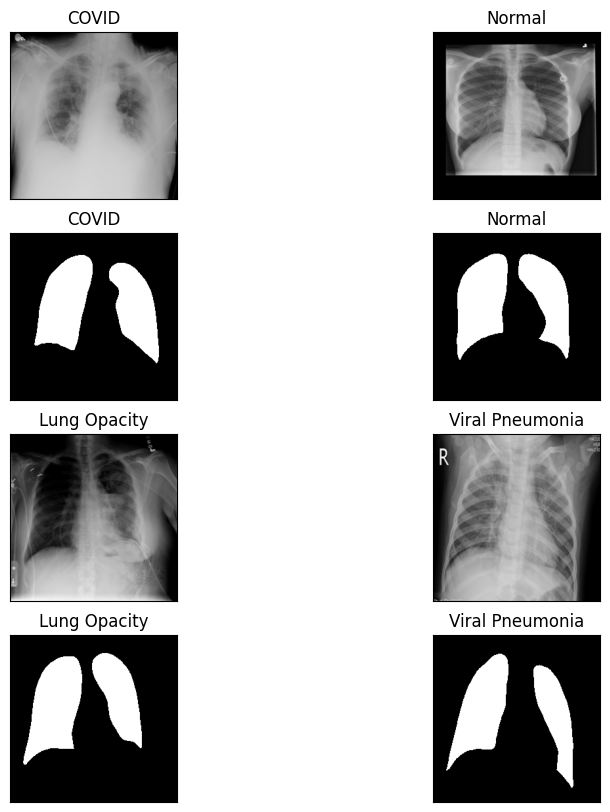

In [7]:
fig = plt.figure(figsize=(10,10))

# images
plt.subplot(421)
plt.imshow(img_covid_1)
plt.title('COVID')
plt.xticks([])
plt.yticks([])

plt.subplot(422)
plt.imshow(img_normal_1)
plt.title('Normal')
plt.xticks([])
plt.yticks([])

plt.subplot(425)
plt.imshow(img_lung_opacity_1)
plt.title('Lung Opacity')
plt.xticks([])
plt.yticks([])

plt.subplot(426)
plt.imshow(img_viral_pneumonia_1)
plt.title('Viral Pneumonia')
plt.xticks([])
plt.yticks([])

# masks
plt.subplot(423)
plt.imshow(mask_covid_1)
plt.title('COVID')
plt.xticks([])
plt.yticks([])

plt.subplot(424)
plt.imshow(mask_normal_1)
plt.title('Normal')
plt.xticks([])
plt.yticks([])

plt.subplot(427)
plt.imshow(mask_lung_opacity_1)
plt.title('Lung Opacity')
plt.xticks([])
plt.yticks([])

plt.subplot(428)
plt.imshow(mask_viral_pneumonia_1)
plt.title('Viral Pneumonia')
plt.xticks([])
plt.yticks([]);

### Statistics for image arrays

In [112]:
# analyzing arrays, calculating average and standard deviation, and showing graphs about the values in the arrays

In [110]:
img_covid_1

array([[[185, 185, 185],
        [ 40,  40,  40],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 24,  24,  24],
        [131, 131, 131]],

       [[ 75,  75,  75],
        [ 14,  14,  14],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  8,   8,   8],
        [ 42,  42,  42]],

       [[ 11,  11,  11],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  3,   3,   3],
        [ 12,  12,  12]],

       ...,

       [[ 78,  78,  78],
        [ 62,  62,  62],
        [ 68,  68,  68],
        ...,
        [  3,   3,   3],
        [ 13,  13,  13],
        [ 27,  27,  27]],

       [[104, 104, 104],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [  1,   1,   1],
        [ 23,  23,  23],
        [ 83,  83,  83]],

       [[156, 156, 156],
        [ 90,  90,  90],
        [ 78,  78,  78],
        ...,
        [  1,   1,   1],
        [ 45,  45,  45],
        [167, 167, 167]]

In [22]:
# importing 50 images and masks and calculating arrays' averages and standard deviations

img_covid_mean = []
img_covid_std = []
img_normal_mean = []
img_normal_std = []
img_lung_opacity_mean = []
img_lung_opacity_std = []
img_viral_pneumonia_mean = []
img_viral_pneumonia_std = []

for i in range(1,51):
    img_covid = cv2.imread(f'../data/COVID/images/COVID-{i}.png', cv2.IMREAD_COLOR)
    img_covid_mean.append(img_covid.mean())
    img_covid_std.append(img_covid.std())

    img_normal = cv2.imread(f'../data/Normal/images/Normal-{i}.png', cv2.IMREAD_COLOR)
    img_normal_mean.append(img_normal.mean())
    img_normal_std.append(img_normal.std())

    img_lung_opacity = cv2.imread(f'../data/Lung_Opacity/images/Lung_Opacity-{i}.png', cv2.IMREAD_COLOR)
    img_lung_opacity_mean.append(img_lung_opacity.mean())
    img_lung_opacity_std.append(img_lung_opacity.std())

    img_viral_pneumonia = cv2.imread(f'../data/Viral Pneumonia/images/Viral Pneumonia-{i}.png', cv2.IMREAD_COLOR)
    img_viral_pneumonia_mean.append(img_viral_pneumonia.mean())
    img_viral_pneumonia_std.append(img_viral_pneumonia.std())



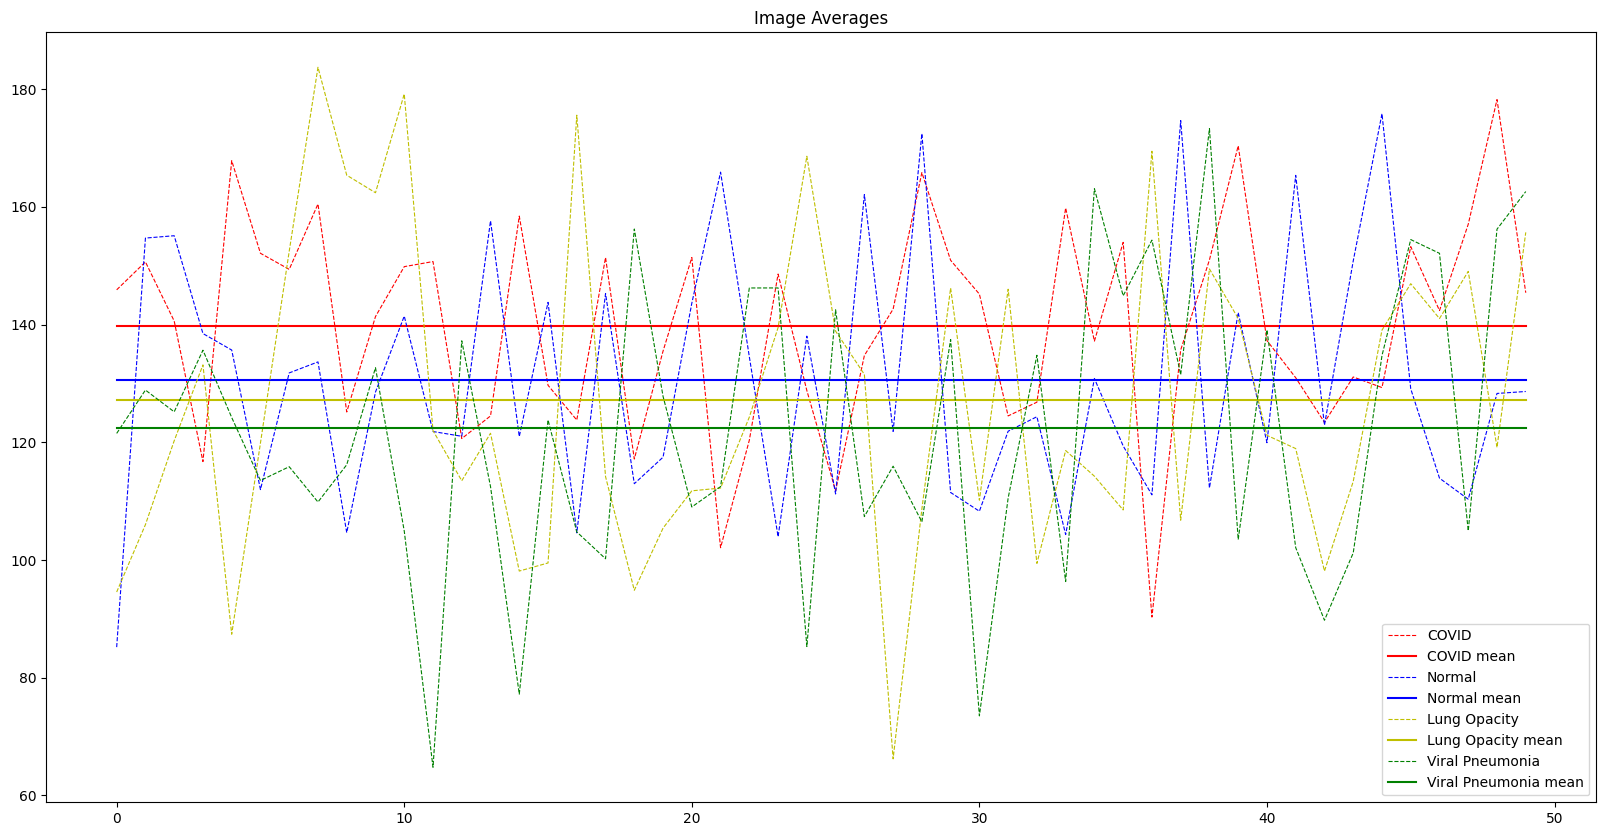

In [75]:
plt.figure(figsize=(20,10))
plt.plot(img_covid_mean, 'r--', linewidth = 0.8, label = 'COVID')
plt.plot(range(0,50), [np.mean(img_covid_mean) for i in range(0,50)], 'r', label = 'COVID mean')
plt.plot(img_normal_mean, 'b--', linewidth = 0.8, label = 'Normal')
plt.plot(range(0,50), [np.mean(img_normal_mean) for i in range(0,50)], 'b', label = 'Normal mean')
plt.plot(img_lung_opacity_mean, 'y--', linewidth = 0.8, label = 'Lung Opacity')
plt.plot(range(0,50), [np.mean(img_lung_opacity_mean) for i in range(0,50)], 'y', label = 'Lung Opacity mean')
plt.plot(img_viral_pneumonia_mean, 'g--', linewidth = 0.8, label = 'Viral Pneumonia')
plt.plot(range(0,50), [np.mean(img_viral_pneumonia_mean) for i in range(0,50)], 'g', label = 'Viral Pneumonia mean')
plt.title('Image Averages')
plt.legend();

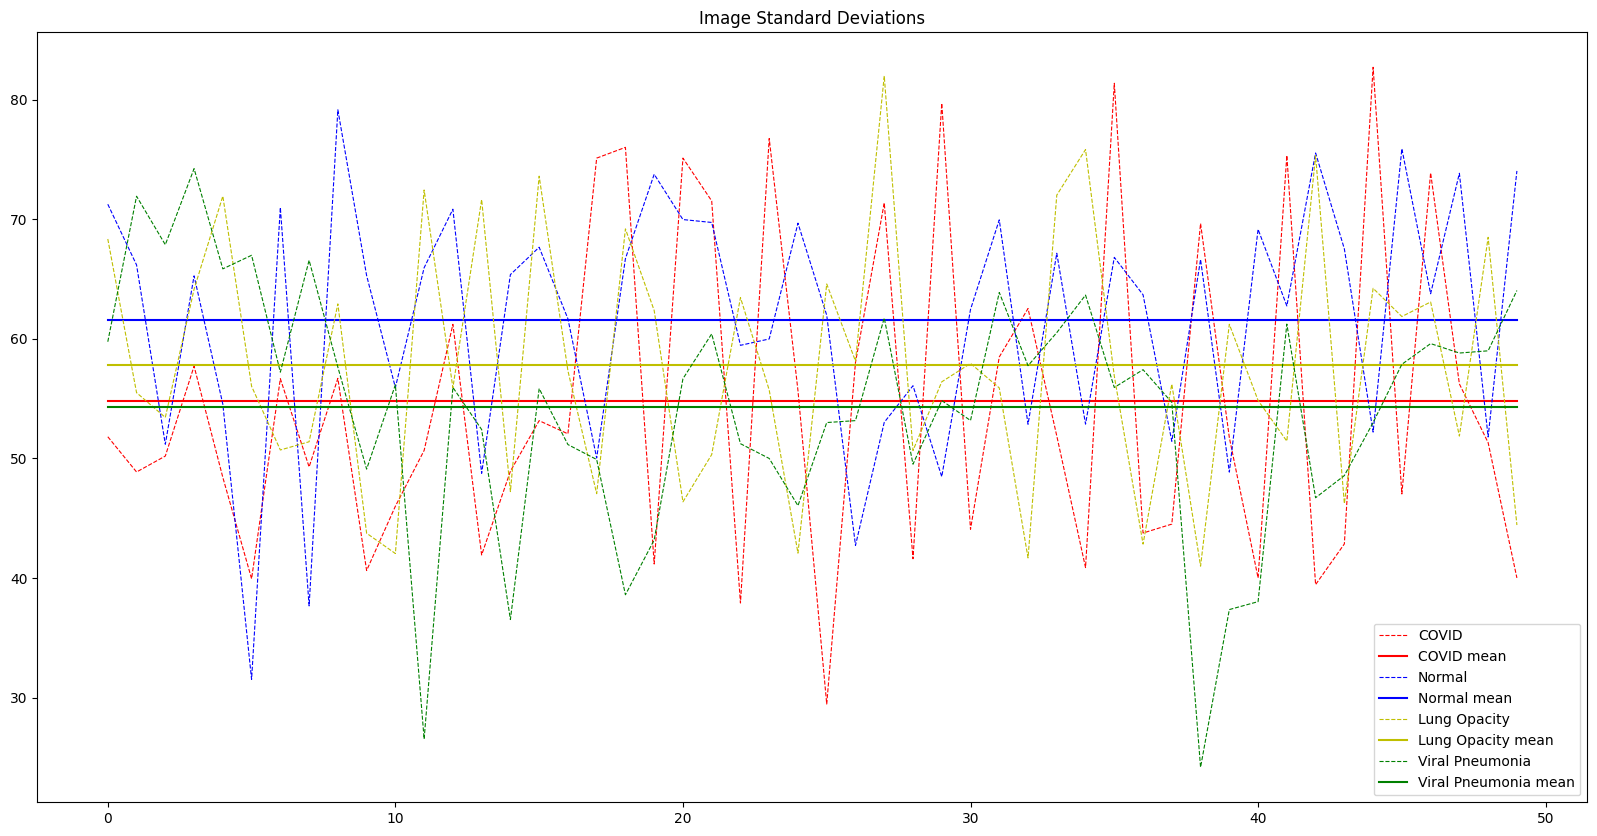

In [76]:
plt.figure(figsize=(20,10))
plt.plot(img_covid_std, 'r--', linewidth = 0.8, label = 'COVID')
plt.plot(range(0,50), [np.mean(img_covid_std) for i in range(0,50)], 'r', label = 'COVID mean')
plt.plot(img_normal_std, 'b--', linewidth = 0.8, label = 'Normal')
plt.plot(range(0,50), [np.mean(img_normal_std) for i in range(0,50)], 'b', label = 'Normal mean')
plt.plot(img_lung_opacity_std, 'y--', linewidth = 0.8, label = 'Lung Opacity')
plt.plot(range(0,50), [np.mean(img_lung_opacity_std) for i in range(0,50)], 'y', label = 'Lung Opacity mean')
plt.plot(img_viral_pneumonia_std, 'g--', linewidth = 0.8, label = 'Viral Pneumonia')
plt.plot(range(0,50), [np.mean(img_viral_pneumonia_std) for i in range(0,50)], 'g', label = 'Viral Pneumonia mean')
plt.title('Image Standard Deviations')
plt.legend();

### Statistics for mask arrays

In [73]:
mask_covid_mean = []
mask_covid_std = []
mask_normal_mean = []
mask_normal_std = []
mask_lung_opacity_mean = []
mask_lung_opacity_std = []
mask_viral_pneumonia_mean = []
mask_viral_pneumonia_std = []

for i in range(1,51):
    mask_covid = cv2.imread(f'../data/COVID/masks/COVID-{i}.png', cv2.IMREAD_COLOR)
    mask_covid_mean.append(mask_covid.mean())
    mask_covid_std.append(mask_covid.std())

    mask_normal = cv2.imread(f'../data/Normal/masks/Normal-{i}.png', cv2.IMREAD_COLOR)
    mask_normal_mean.append(mask_normal.mean())
    mask_normal_std.append(mask_normal.std())

    mask_lung_opacity = cv2.imread(f'../data/Lung_Opacity/masks/Lung_Opacity-{i}.png', cv2.IMREAD_COLOR)
    mask_lung_opacity_mean.append(mask_lung_opacity.mean())
    mask_lung_opacity_std.append(mask_lung_opacity.std())

    mask_viral_pneumonia = cv2.imread(f'../data/Viral Pneumonia/masks/Viral Pneumonia-{i}.png', cv2.IMREAD_COLOR)
    mask_viral_pneumonia_mean.append(mask_viral_pneumonia.mean())
    mask_viral_pneumonia_std.append(mask_viral_pneumonia.std())



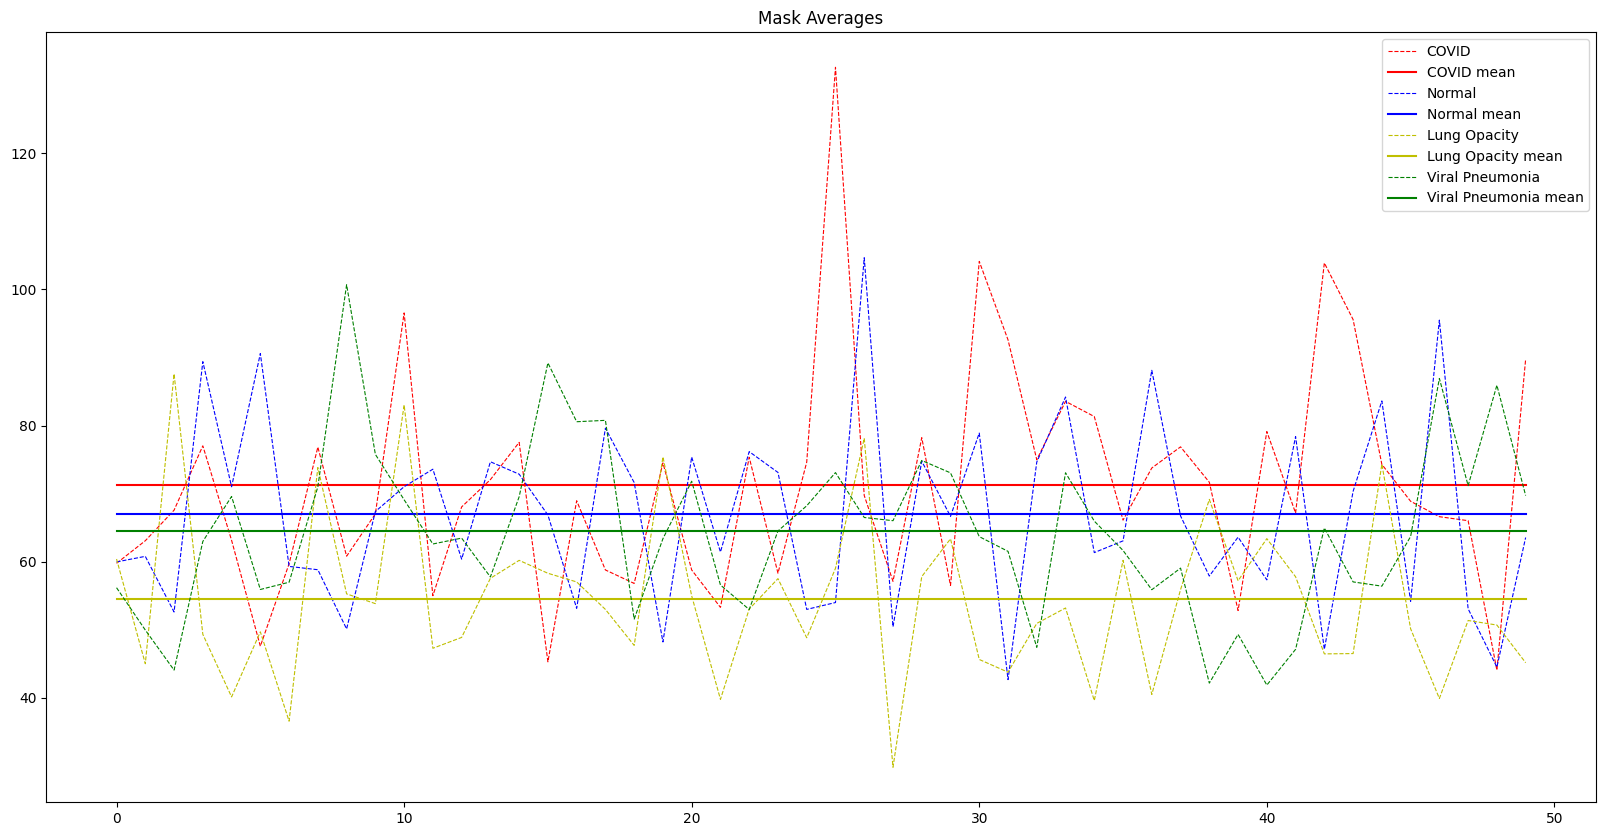

In [77]:
plt.figure(figsize=(20,10))
plt.plot(mask_covid_mean, 'r--', linewidth = 0.8, label = 'COVID')
plt.plot(range(0,50), [np.mean(mask_covid_mean) for i in range(0,50)], 'r', label = 'COVID mean')
plt.plot(mask_normal_mean, 'b--', linewidth = 0.8, label = 'Normal')
plt.plot(range(0,50), [np.mean(mask_normal_mean) for i in range(0,50)], 'b', label = 'Normal mean')
plt.plot(mask_lung_opacity_mean, 'y--', linewidth = 0.8, label = 'Lung Opacity')
plt.plot(range(0,50), [np.mean(mask_lung_opacity_mean) for i in range(0,50)], 'y', label = 'Lung Opacity mean')
plt.plot(mask_viral_pneumonia_mean, 'g--', linewidth = 0.8, label = 'Viral Pneumonia')
plt.plot(range(0,50), [np.mean(mask_viral_pneumonia_mean) for i in range(0,50)], 'g', label = 'Viral Pneumonia mean')
plt.title('Mask Averages')
plt.legend();

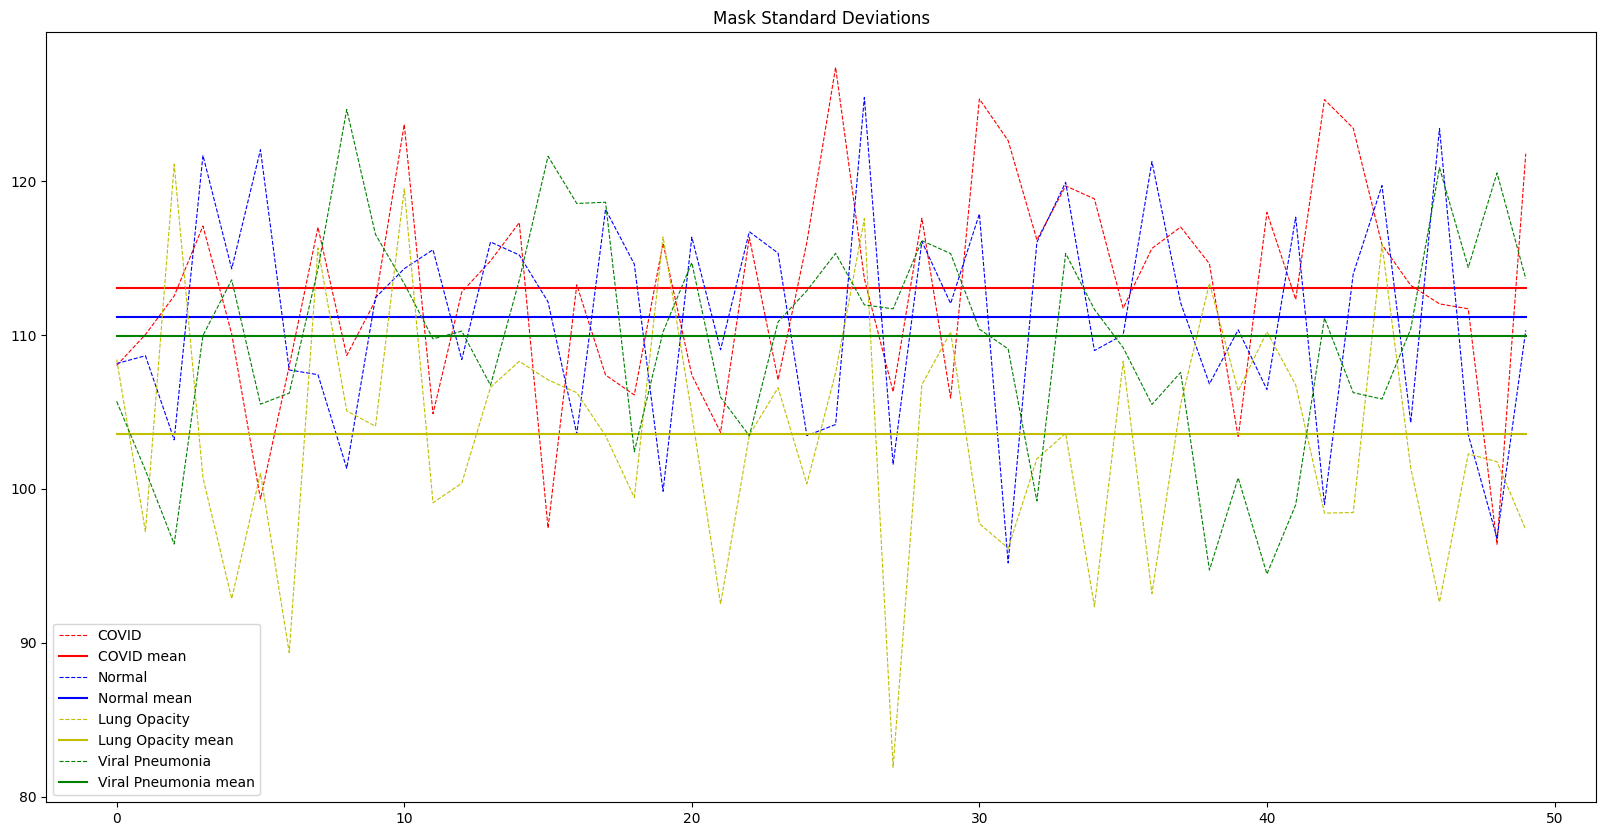

In [79]:
plt.figure(figsize=(20,10))
plt.plot(mask_covid_std, 'r--', linewidth = 0.8, label = 'COVID')
plt.plot(range(0,50), [np.mean(mask_covid_std) for i in range(0,50)], 'r', label = 'COVID mean')
plt.plot(mask_normal_std, 'b--', linewidth = 0.8, label = 'Normal')
plt.plot(range(0,50), [np.mean(mask_normal_std) for i in range(0,50)], 'b', label = 'Normal mean')
plt.plot(mask_lung_opacity_std, 'y--', linewidth = 0.8, label = 'Lung Opacity')
plt.plot(range(0,50), [np.mean(mask_lung_opacity_std) for i in range(0,50)], 'y', label = 'Lung Opacity mean')
plt.plot(mask_viral_pneumonia_std, 'g--', linewidth = 0.8, label = 'Viral Pneumonia')
plt.plot(range(0,50), [np.mean(mask_viral_pneumonia_std) for i in range(0,50)], 'g', label = 'Viral Pneumonia mean')
plt.title('Mask Standard Deviations')
plt.legend();

In [80]:
img_avgs = [np.mean(img_covid_mean), np.mean(img_normal_mean), np.mean(img_lung_opacity_mean), np.mean(img_viral_pneumonia_mean)]
img_stds = [np.mean(img_covid_std), np.mean(img_normal_std), np.mean(img_lung_opacity_std), np.mean(img_viral_pneumonia_std)]
mask_avgs = [np.mean(mask_covid_mean), np.mean(mask_normal_mean), np.mean(mask_lung_opacity_mean), np.mean(mask_viral_pneumonia_mean)]
mask_stds = [np.mean(mask_covid_std), np.mean(mask_normal_std), np.mean(mask_lung_opacity_std), np.mean(mask_viral_pneumonia_std)]

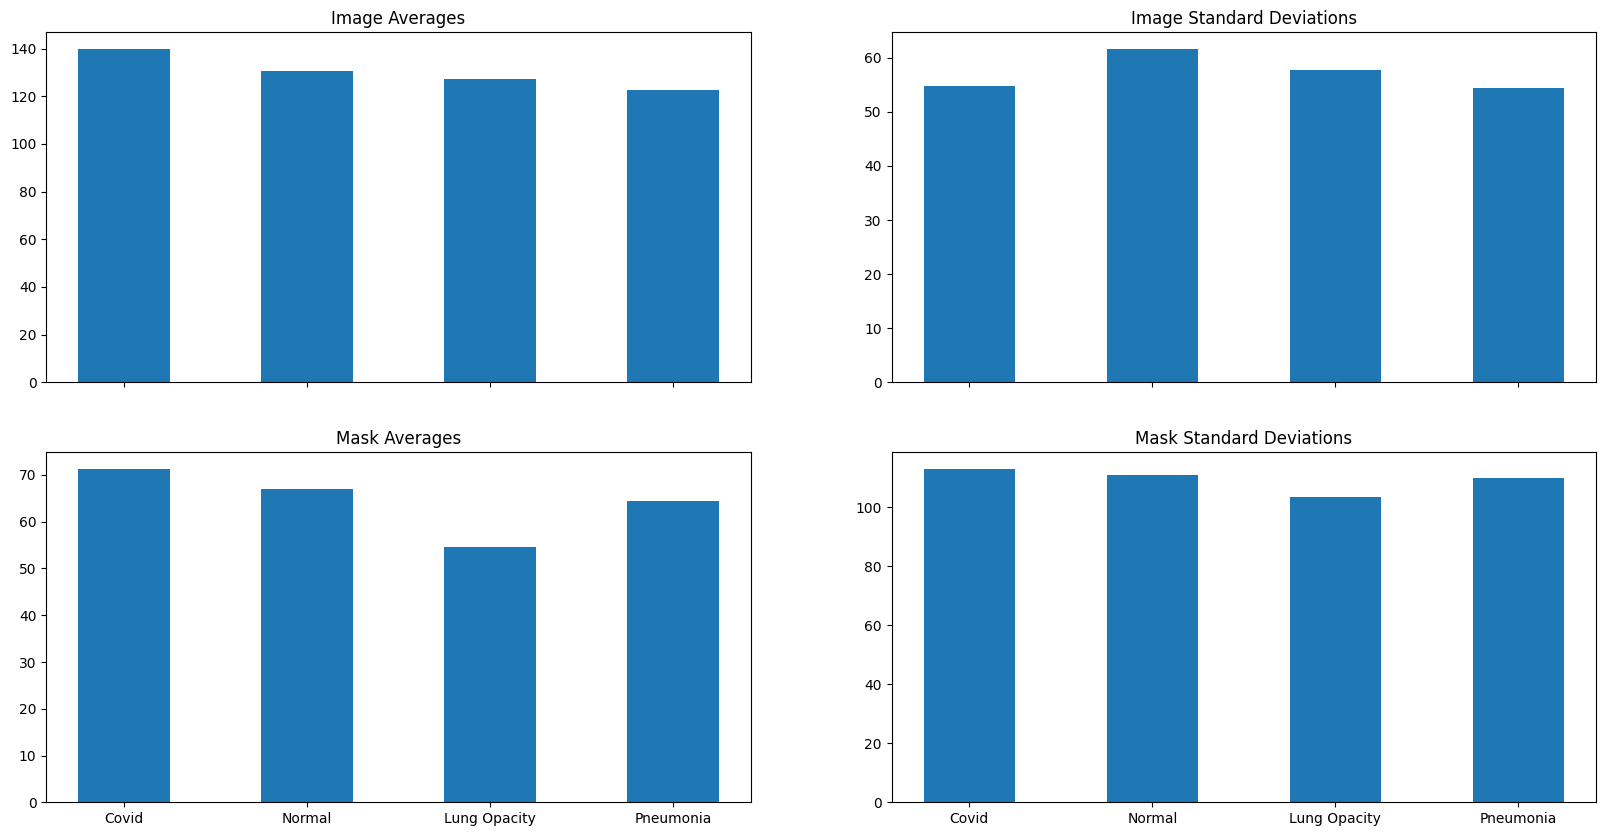

In [133]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.bar(range(1,5), img_avgs, width = 0.5)
plt.title('Image Averages')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(222)
plt.bar(range(1,5), img_stds, width = 0.5)
plt.title('Image Standard Deviations')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(223)
plt.bar(range(1,5), mask_avgs, width = 0.5)
plt.title('Mask Averages')
plt.xticks([1, 2, 3, 4], ['Covid', 'Normal', 'Lung Opacity', 'Pneumonia']);

plt.subplot(224)
plt.bar(range(1,5), mask_stds, width = 0.5)
plt.title('Mask Standard Deviations')
plt.xticks([1, 2, 3, 4], ['Covid', 'Normal', 'Lung Opacity', 'Pneumonia']);

In [26]:
img_covid_mean = []
img_covid_std = []
img_covid_median = []
img_normal_mean = []
img_normal_std = []
img_normal_median = []
img_lung_opacity_mean = []
img_lung_opacity_std = []
img_lung_opacity_median = []
img_viral_pneumonia_mean = []
img_viral_pneumonia_std = []
img_viral_pneumonia_median = []

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/COVID'))+1):
    img_covid = cv2.imread(f'../../data/raw/COVID/images/COVID-{i}.png', cv2.IMREAD_COLOR)
    img_covid_mean.append(img_covid.mean())
    img_covid_std.append(img_covid.std())
    img_covid_median.append(np.median(img_covid))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Normal'))+1):
    img_normal = cv2.imread(f'../../data/raw/Normal/images/Normal-{i}.png', cv2.IMREAD_COLOR)
    img_normal_mean.append(img_normal.mean())
    img_normal_std.append(img_normal.std())
    img_normal_median.append(np.median(img_normal))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Lung_Opacity'))+1):
    img_lung_opacity = cv2.imread(f'../../data/raw/Lung_Opacity/images/Lung_Opacity-{i}.png', cv2.IMREAD_COLOR)
    img_lung_opacity_mean.append(img_lung_opacity.mean())
    img_lung_opacity_std.append(img_lung_opacity.std())
    img_lung_opacity_median.append(np.median(img_lung_opacity))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Viral Pneumonia'))+1):
    img_viral_pneumonia = cv2.imread(f'../../data/raw/Viral Pneumonia/images/Viral Pneumonia-{i}.png', cv2.IMREAD_COLOR)
    img_viral_pneumonia_mean.append(img_viral_pneumonia.mean())
    img_viral_pneumonia_std.append(img_viral_pneumonia.std())
    img_viral_pneumonia_median.append(np.median(img_viral_pneumonia))

In [25]:
mask_covid_mean = []
mask_covid_std = []
mask_covid_median = []
mask_normal_mean = []
mask_normal_std = []
mask_normal_median = []
mask_lung_opacity_mean = []
mask_lung_opacity_std = []
mask_lung_opacity_median = []
mask_viral_pneumonia_mean = []
mask_viral_pneumonia_std = []
mask_viral_pneumonia_median = []

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/COVID'))+1):
    mask_covid = cv2.imread(f'../../data/raw/COVID/masks/COVID-{i}.png', cv2.IMREAD_COLOR)
    mask_covid_mean.append(mask_covid.mean())
    mask_covid_std.append(mask_covid.std())
    mask_covid_median.append(np.median(mask_covid))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Normal'))+1):
    mask_normal = cv2.imread(f'../../data/raw/Normal/masks/Normal-{i}.png', cv2.IMREAD_COLOR)
    mask_normal_mean.append(mask_normal.mean())
    mask_normal_std.append(mask_normal.std())
    mask_normal_median.append(np.median(mask_normal))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Lung_Opacity'))+1):
    mask_lung_opacity = cv2.imread(f'../../data/raw/Lung_Opacity/masks/Lung_Opacity-{i}.png', cv2.IMREAD_COLOR)
    mask_lung_opacity_mean.append(mask_lung_opacity.mean())
    mask_lung_opacity_std.append(mask_lung_opacity.std())
    mask_lung_opacity_median.append(np.median(mask_lung_opacity))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Viral Pneumonia'))+1):
    mask_viral_pneumonia = cv2.imread(f'../../data/raw/Viral Pneumonia/masks/Viral Pneumonia-{i}.png', cv2.IMREAD_COLOR)
    mask_viral_pneumonia_mean.append(mask_viral_pneumonia.mean())
    mask_viral_pneumonia_std.append(mask_viral_pneumonia.std())
    mask_viral_pneumonia_median.append(np.median(mask_viral_pneumonia))

In [24]:
roi_covid_mean = []
roi_covid_std = []
roi_covid_median = []
roi_normal_mean = []
roi_normal_std = []
roi_normal_median = []
roi_lung_opacity_mean = []
roi_lung_opacity_std = []
roi_lung_opacity_median = []
roi_viral_pneumonia_mean = []
roi_viral_pneumonia_std = []
roi_viral_pneumonia_median = []

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/COVID'))+1):
    roi_covid = cv2.imread(f'../../data/preprocessed/roi/COVID/COVID-{i}.png', cv2.IMREAD_COLOR)
    roi_covid_mean.append(roi_covid.mean())
    roi_covid_std.append(roi_covid.std())
    roi_covid_median.append(np.median(roi_covid))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Normal'))+1):
    roi_normal = cv2.imread(f'../../data/preprocessed/roi/Normal/Normal-{i}.png', cv2.IMREAD_COLOR)
    roi_normal_mean.append(roi_normal.mean())
    roi_normal_std.append(roi_normal.std())
    roi_normal_median.append(np.median(roi_normal))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Lung_Opacity'))+1):
    roi_lung_opacity = cv2.imread(f'../../data/preprocessed/roi/Lung_Opacity/Lung_Opacity-{i}.png', cv2.IMREAD_COLOR)
    roi_lung_opacity_mean.append(roi_lung_opacity.mean())
    roi_lung_opacity_std.append(roi_lung_opacity.std())
    roi_lung_opacity_median.append(np.median(roi_lung_opacity))

for i in range(1, len(os.listdir(f'../../data/preprocessed/raw/Viral Pneumonia'))+1):
    roi_viral_pneumonia = cv2.imread(f'../../data/preprocessed/roi/Viral Pneumonia/Viral Pneumonia-{i}.png', cv2.IMREAD_COLOR)
    roi_viral_pneumonia_mean.append(roi_viral_pneumonia.mean())
    roi_viral_pneumonia_std.append(roi_viral_pneumonia.std())
    roi_viral_pneumonia_median.append(np.median(roi_viral_pneumonia))

In [28]:
img_avgs = [np.mean(img_normal_mean), np.mean(img_lung_opacity_mean), np.mean(img_viral_pneumonia_mean), np.mean(img_covid_mean)]
img_stds = [np.mean(img_normal_std), np.mean(img_lung_opacity_std), np.mean(img_viral_pneumonia_std), np.mean(img_covid_std)]
img_medians = [np.mean(img_normal_median), np.mean(img_lung_opacity_median), np.mean(img_viral_pneumonia_median), np.mean(img_covid_median)]
mask_avgs = [np.mean(mask_normal_mean), np.mean(mask_lung_opacity_mean), np.mean(mask_viral_pneumonia_mean), np.mean(mask_covid_mean)]
mask_stds = [np.mean(mask_normal_std), np.mean(mask_lung_opacity_std), np.mean(mask_viral_pneumonia_std), np.mean(mask_covid_std)]
mask_medians = [np.mean(mask_normal_median), np.mean(mask_lung_opacity_median), np.mean(mask_viral_pneumonia_median), np.mean(mask_covid_median)]
roi_avgs = [np.mean(roi_normal_mean), np.mean(roi_lung_opacity_mean), np.mean(roi_viral_pneumonia_mean), np.mean(roi_covid_mean)]
roi_stds = [np.mean(roi_normal_std), np.mean(roi_lung_opacity_std), np.mean(roi_viral_pneumonia_std), np.mean(roi_covid_std)]
roi_medians = [np.mean(roi_normal_median), np.mean(roi_lung_opacity_median), np.mean(roi_viral_pneumonia_median), np.mean(roi_covid_median)]

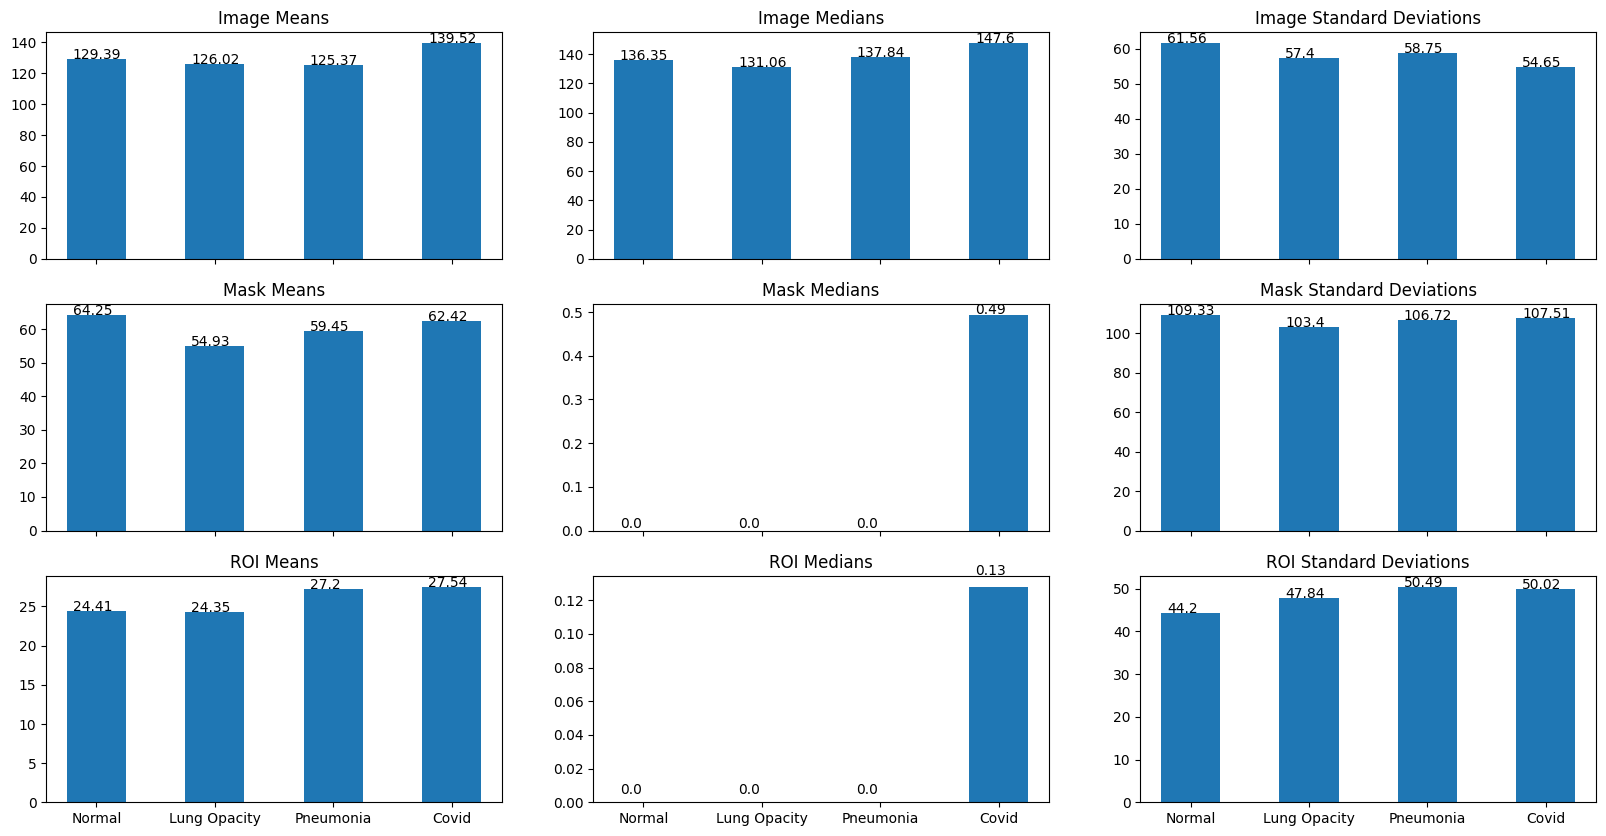

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(331)
bars = plt.bar(range(1,5), img_avgs, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('Image Means')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(332)
bars = plt.bar(range(1,5), img_medians, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('Image Medians')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(333)
bars = plt.bar(range(1,5), img_stds, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('Image Standard Deviations')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(334)
bars = plt.bar(range(1,5), mask_avgs, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('Mask Means')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(335)
bars = plt.bar(range(1,5), mask_medians, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('Mask Medians')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(336)
bars = plt.bar(range(1,5), mask_stds, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('Mask Standard Deviations')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(337)
bars = plt.bar(range(1,5), roi_avgs, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('ROI Means')
plt.xticks([1, 2, 3, 4], ['Normal', 'Lung Opacity', 'Pneumonia', 'Covid']);

plt.subplot(338)
bars = plt.bar(range(1,5), roi_medians, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('ROI Medians')
plt.xticks([1, 2, 3, 4], ['Normal', 'Lung Opacity', 'Pneumonia', 'Covid']);

plt.subplot(339)
bars = plt.bar(range(1,5), roi_stds, width = 0.5)
for bar in bars:
    yval = round(bar.get_height(), 2)
    plt.text(bar.get_x() + 0.05, yval + .005, yval)
plt.title('ROI Standard Deviations')
plt.xticks([1, 2, 3, 4], ['Normal', 'Lung Opacity', 'Pneumonia', 'Covid']);